In [37]:
import warnings; 
warnings.simplefilter('ignore')

import pandas as pd
from prophet import Prophet
from fbprophet import Prophet

from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv('C:/Users/seanl/OneDrive/Desktop/final_project/hockey_forecast/tables/big_table.csv')

In [6]:
data.describe()

,Unnamed: 0,Rk,Age,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,Player ID
count,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000,13694.000000
mean,441.303929,442.303929,26.593106,49.205930,7.667884,13.062217,20.730101,-0.361180,29.905725,2.504542,5.608807,82.727326,7.792376,810.879290,1193.425150
std,254.946852,254.946852,4.505154,27.396578,8.829534,13.081136,20.661274,9.526586,29.983541,2.768383,6.179851,69.610942,7.713556,555.483786,714.616435
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,-46.000000,0.000000,-1.900000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,220.000000,221.000000,23.000000,24.000000,1.000000,2.000000,4.000000,-5.000000,8.000000,0.200000,1.000000,23.000000,3.000000,286.000000,594.000000
50%,441.500000,442.500000,26.000000,55.000000,4.000000,9.000000,14.000000,-1.000000,22.000000,1.600000,3.000000,69.500000,7.200000,821.500000,1149.000000
75%,662.000000,663.000000,30.000000,75.000000,12.000000,20.000000,32.000000,4.000000,42.000000,4.100000,9.000000,126.000000,11.200000,1258.000000,1747.000000
max,912.000000,913.000000,48.000000,84.000000,65.000000,96.000000,128.000000,50.000000,324.000000,17.200000,48.000000,528.000000,100.000000,2412.000000,2779.000000


In [62]:
data['Next Szn Scoring'] = None
data

,Unnamed: 0,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,ATOI,Player ID,Next Szn Scoring
0,0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,6,0.0,49,8:10,1,None
1,1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,12:18,2,None
2,2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,12:53,3,None
3,3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,78,11.5,662,9:44,4,None
4,4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,241,9.1,1258,16:20,5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689,908,909,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,171,14.0,1126,20:06,1651,None
13690,909,910,Radim Zohorna\zohorra01,24,PIT,F,8,2,2,4,4,4,0.6,2,8,25.0,72,9:02,2778,None
13691,910,911,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,39,7.7,864,18:23,2779,None
13692,911,912,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,74,14.9,701,16:41,1536,None


In [16]:
data['Player'].count()

13694

In [11]:
data.dtypes

Unnamed: 0      int64
Rk              int64
Player         object
Age             int64
Tm             object
Pos            object
GP              int64
G               int64
A               int64
PTS             int64
+/-             int64
PIM             int64
PS            float64
EV              int64
S               int64
S%            float64
TOI             int64
ATOI           object
Player ID       int64
dtype: object

In [18]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [19]:
data

,Unnamed: 0,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,ATOI,Player ID
0,0,1,Ramzi Abid\abidra01,25,ATL,LW,6,0,2,2,1,6,0.1,0,6,0.0,49,8:10,1
1,1,2,Craig Adams\adamscr01,28,CAR,RW,67,10,11,21,1,51,1.6,8,68,14.7,824,12:18,2
2,2,3,Kevyn Adams\adamske01,31,CAR,C,82,15,8,23,0,36,1.8,13,160,9.4,1057,12:53,3
3,3,4,Dmitry Afanasenkov\afanadm01,25,TBL,LW,68,9,6,15,-7,16,1.0,8,78,11.5,662,9:44,4
4,4,5,Maxim Afinogenov\afinoma01,26,BUF,RW,77,22,51,73,6,84,7.4,11,241,9.1,1258,16:20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13689,908,909,Mika Zibanejad\zibanmi01,27,NYR,C,56,24,26,50,2,18,5.7,12,171,14.0,1126,20:06,1651
13690,909,910,Radim Zohorna\zohorra01,24,PIT,F,8,2,2,4,4,4,0.6,2,8,25.0,72,9:02,2778
13691,910,911,Artem Zub\zubar01,25,OTT,D,47,3,11,14,4,26,2.8,3,39,7.7,864,18:23,2779
13692,911,912,Mats Zuccarello\zuccama01,33,MIN,LW,42,11,24,35,9,8,3.9,8,74,14.9,701,16:41,1536


In [26]:
data[data['Player ID'] == 1653]

,Unnamed: 0,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,PS,EV,S,S%,TOI,ATOI,Player ID
5925,893,894,Jason Zucker\zuckeja01,20,MIN,LW,6,0,2,2,-2,2,0.0,0,10,0.0,66,11:02,1653
6728,838,839,Jason Zucker\zuckeja01,21,MIN,LW,20,4,1,5,4,8,0.8,4,34,11.8,225,11:16,1653
7590,885,886,Jason Zucker\zuckeja01,22,MIN,LW,21,4,1,5,2,2,0.6,3,40,10.0,273,12:59,1653
8443,881,882,Jason Zucker\zuckeja01,23,MIN,LW,51,21,5,26,-9,18,3.7,19,124,16.9,768,15:04,1653
9315,897,898,Jason Zucker\zuckeja01,24,MIN,LW,71,13,10,23,-4,20,2.1,12,158,8.2,1106,15:35,1653
10182,886,887,Jason Zucker\zuckeja01,25,MIN,LW,79,22,25,47,34,30,6.7,21,172,12.8,1208,15:17,1653
11049,888,889,Jason Zucker\zuckeja01,26,MIN,LW,82,33,31,64,8,44,7.8,25,222,14.9,1391,16:58,1653
11937,904,905,Jason Zucker\zuckeja01,27,MIN,LW,81,21,21,42,-9,28,4.1,14,214,9.8,1383,17:05,1653
12806,881,882,Jason Zucker\zuckeja01,28,TOT,LW,60,20,21,41,-4,21,4.3,13,111,18.0,980,16:20,1653
13693,912,913,Jason Zucker\zuckeja01,29,PIT,LW,38,9,9,18,-8,21,1.3,8,67,13.4,596,15:41,1653


<AxesSubplot:>

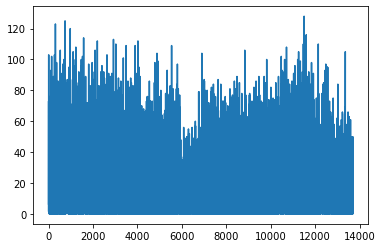

In [31]:
temp = data['PTS']
points.plot()

<AxesSubplot:>

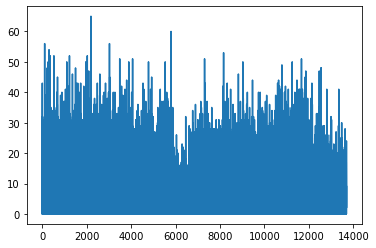

In [28]:
goals=data['G']
goals.plot()

In [63]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [33]:
WINDOW_SIZE = 5 
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((13689, 5, 1), (13689,))

In [36]:
X

array([[[ 2],
        [21],
        [23],
        [15],
        [73]],

       [[21],
        [23],
        [15],
        [73],
        [ 6]],

       [[23],
        [15],
        [73],
        [ 6],
        [ 7]],

       ...,

       [[ 0],
        [ 9],
        [13],
        [50],
        [ 4]],

       [[ 9],
        [13],
        [50],
        [ 4],
        [14]],

       [[13],
        [50],
        [ 4],
        [14],
        [35]]], dtype=int64)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10951, 5, 1), (10951,), (2738, 5, 1), (2738,))

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [41]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [42]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [43]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[cp])

Epoch 1/10
334/343 [============================>.] - ETA: 0s - loss: 483.5692 - root_mean_squared_error: 21.9902

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


343/343 [==============================] - 7s 15ms/step - loss: 482.3830 - root_mean_squared_error: 21.9632 - val_loss: 413.4296 - val_root_mean_squared_error: 20.3330
Epoch 2/10
343/343 [==============================] - 1s 4ms/step - loss: 430.0779 - root_mean_squared_error: 20.7383 - val_loss: 413.5733 - val_root_mean_squared_error: 20.3365
Epoch 3/10
334/343 [============================>.] - ETA: 0s - loss: 429.3823 - root_mean_squared_error: 20.7215

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


343/343 [==============================] - 5s 13ms/step - loss: 430.3576 - root_mean_squared_error: 20.7451 - val_loss: 412.7226 - val_root_mean_squared_error: 20.3156
Epoch 4/10
343/343 [==============================] - 1s 4ms/step - loss: 430.3459 - root_mean_squared_error: 20.7448 - val_loss: 412.7473 - val_root_mean_squared_error: 20.3162
Epoch 5/10
336/343 [============================>.] - ETA: 0s - loss: 430.6276 - root_mean_squared_error: 20.7516

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


343/343 [==============================] - 4s 13ms/step - loss: 430.2627 - root_mean_squared_error: 20.7428 - val_loss: 412.4892 - val_root_mean_squared_error: 20.3098
Epoch 6/10
343/343 [==============================] - 1s 4ms/step - loss: 430.3156 - root_mean_squared_error: 20.7440 - val_loss: 414.4690 - val_root_mean_squared_error: 20.3585
Epoch 7/10
336/343 [============================>.] - ETA: 0s - loss: 429.3841 - root_mean_squared_error: 20.7216

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


343/343 [==============================] - 5s 13ms/step - loss: 430.1753 - root_mean_squared_error: 20.7407 - val_loss: 412.1655 - val_root_mean_squared_error: 20.3019
Epoch 8/10
343/343 [==============================] - 1s 4ms/step - loss: 430.1669 - root_mean_squared_error: 20.7405 - val_loss: 412.1789 - val_root_mean_squared_error: 20.3022
Epoch 9/10
332/343 [============================>.] - ETA: 0s - loss: 430.0469 - root_mean_squared_error: 20.7376

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


343/343 [==============================] - 4s 12ms/step - loss: 430.0773 - root_mean_squared_error: 20.7383 - val_loss: 411.9935 - val_root_mean_squared_error: 20.2976
Epoch 10/10
343/343 [==============================] - 1s 4ms/step - loss: 429.9582 - root_mean_squared_error: 20.7354 - val_loss: 412.2955 - val_root_mean_squared_error: 20.3051


In [44]:
from tensorflow.keras.models import load_model

In [45]:
model1 = load_model('model1/')

In [46]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,21.237030,17
1,20.792114,63
2,20.304363,38
3,20.447588,2
4,20.463470,37
...,...,...
10946,20.695215,23
10947,20.098925,10
10948,21.104380,23
10949,20.609554,1


In [47]:
import matplotlib.pyplot as plt

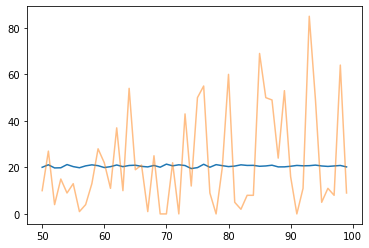

In [59]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100], alpha=0.5)